Name : **Balaji Subramani**  
Matrikel-Nr : **798924**

## Fire in the nature park

***Problem Summary***

The administration of the nature park Montesinho in north-east Portugal wants to predict wild fires based on wheather data of the Fire-Wheather-Index (FWI). The aim is to recognize the affected area and consequently the intensity of the imminent wild fire as early as possible in order to be able to adequatly assess the danger caused by the fire. To this aim, data from 517 wild fires have been collected. The features are summarized below

***Features***

- X (X-coordinate of the fire in the park: 1 to 9)
- Y (Y-coordinate of the fire in the park: 2 to 9)
- Month month: ”jan“ to ”dec“)
- day (day: ”mon“ bis ”sun“)
- FFMC (FFMC index of the FWI system: 18.7 to 96.2)
- DMC (DMC index of the FWI system: 1.1 bis 291.3)
- DC (DC index of the system: 7.9 bis 860.6)
- ISI (ISI index of the FWI systems: 0.0 to 56.1)
- temp (temperature in degrees Celsius: 2.2 to 33.3)
- RH (relative humidity in %: 15 to 100)
- wind (wind velocity in km/h: 0.4 to 9.4)
- rain (rainfall in mm/m2: 0.0 to 6.4)
- **area (forest area that has been burnt in hectare: 0.09 to 1090.84)**

***Goal***

Predict **area** that has been burnt in hectare

Load the data into Python and preprocess them appropriately; perform an adequate normalization of the features. For example, he label area is distributed very non-uniformly such that a transformation such as area0 = log(1 + area) is appropriate. Identify and implement a suitable learning method in Python. Train and evaluate the model. Propose a trivial baseline model with which you can compare your model’s performance. Provide the RMSE (root mean square error) of your model and the baseline model obtained with 10-fold cross-validation. Provide a short documentation and motivation of each of your steps.



In [1]:
import datetime

import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn import metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings("ignore")

In [2]:
#### Importing the file ####
Path="C:\\Users\\Dell\\Documents\\Python Scripts\ML\\ML Project\\"
Filename='fires.csv'
Data=pd.read_csv(Filename)

## Data Analysis

In [3]:
#### Sample data from data ###
Data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
#### Features from data ###
Data.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [5]:
#### Information from dataset ###
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


#### Inference :

- There is no **null** values in data
- X,Y, month, day columns are **categorical values**

In [6]:
Data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


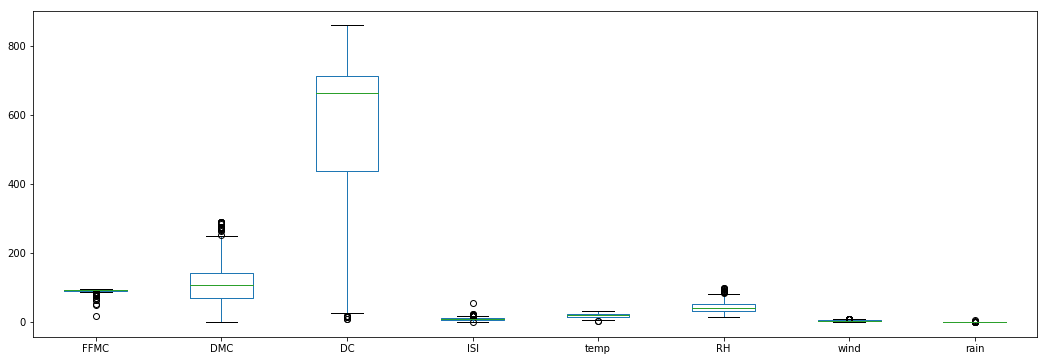

In [7]:
ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']
Data[ncols].plot(kind="box", figsize=(18,6))

### Findings from description

- FMCC is mostly between of **90 to 96**. But the minimum is 18. So there are a couple of ***outliers*** in this.
- Same scenario for Rain feature

In [8]:
## Storing Area for future comparision purpose
Data["Orgarea"]=Data["area"]

## Nature Park Map & Affected place

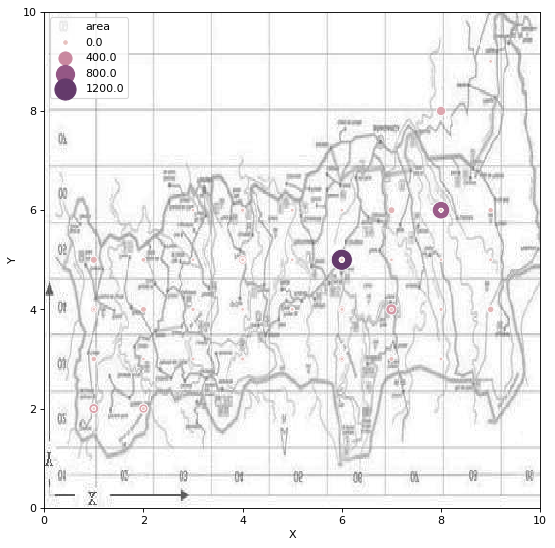

In [9]:
## Comparing the Fire affected location based on available Map from internet##
## Source of Image : https://www.researchgate.net/figure/The-map-of-the-Montesinho-natural-park_fig1_238767143

import matplotlib.image as mpimg
import seaborn as sns

from matplotlib.pyplot import figure
figure(num=None, figsize=(8,16), dpi=80, facecolor='w', edgecolor='k')

map_img = mpimg.imread('images\map.png') 
plt.imshow(map_img, zorder=0, extent=[0, 10, 0, 10])
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x='X', y='Y',size='area', hue='area', data=Data,sizes=(10, 360),palette=cmap)
plt.show()

### Findings from map plot

- Area **(6,5) & (8,6)** is the most affected place and other places are affected very less. So dependent variable data is skewed in left side.


### Encoding the categorical columns (Day, Month, X and Y)

In [10]:
#### Function for Renaming day columns for Encoding ####

def renames(feature='day', nbr=12):
    Dict_cols={}
    for i in range(nbr):
        Dict_cols[i]=feature+str(i)
    return Dict_cols
    

In [11]:
#### Encoding the categorical columns 

dummies= pd.get_dummies(Data['day'])
Encoded_Data=Data.join(dummies)

dummies= pd.get_dummies(Data['month'])
Encoded_Data=Encoded_Data.join(dummies)

dummies= pd.get_dummies(Data['X'])
Encoded_Data=Encoded_Data.join(dummies)
Encoded_Data=Encoded_Data.rename(index=str, columns=renames('X_',Data['X'].max()+1))

dummies= pd.get_dummies(Data['Y'])
dummies=dummies.rename(index=str, columns=renames('Y_',Data['Y'].max()+1))
Encoded_Data=Encoded_Data.join(dummies)

## Droping the old columns and Extra catergorical value field (Degree of freedom from categorical values : n-1)
Encoded_Data=Encoded_Data.drop(columns=['day','month','X','Y','fri', 'dec'])

Encod_ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr', 'aug', 'feb','jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'X_1', 'X_2',       'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_2', 'Y_3', 'Y_4',       'Y_5', 'Y_6', 'Y_8', 'Y_9']

### Correlation Study

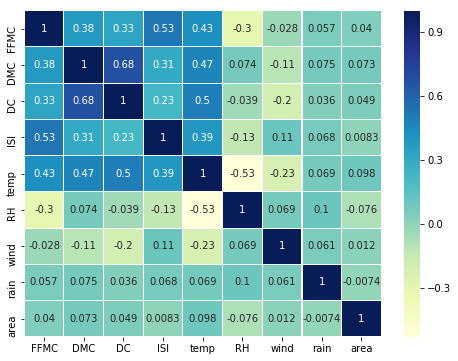

In [12]:
## Checking the independence between the X features

ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain', 'area']
cm = np.corrcoef(Data[ncols].values.T) 
f, ax = plt.subplots(figsize =(8, 6)) 
sns.heatmap(cm, ax = ax, cmap ="YlGnBu",annot=True,linewidths = 0.1, yticklabels = ncols,xticklabels = ncols) 

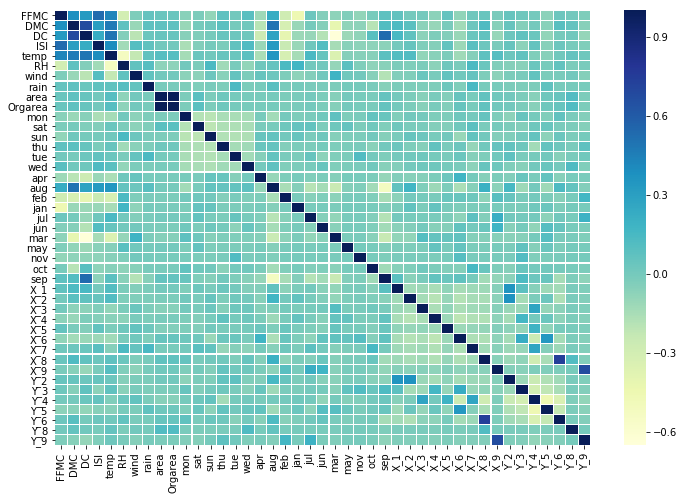

In [13]:
ncols=Encoded_Data.columns
cm = np.corrcoef(Encoded_Data.values.T) 
f, ax = plt.subplots(figsize =(12, 8)) 
sns.heatmap(cm, ax = ax, cmap ="YlGnBu",annot=False,linewidths = 0.1, yticklabels = ncols,xticklabels = ncols) 

#### Understanding from Correlation

- All independent columns are not dependent. 

### Finding the pattens

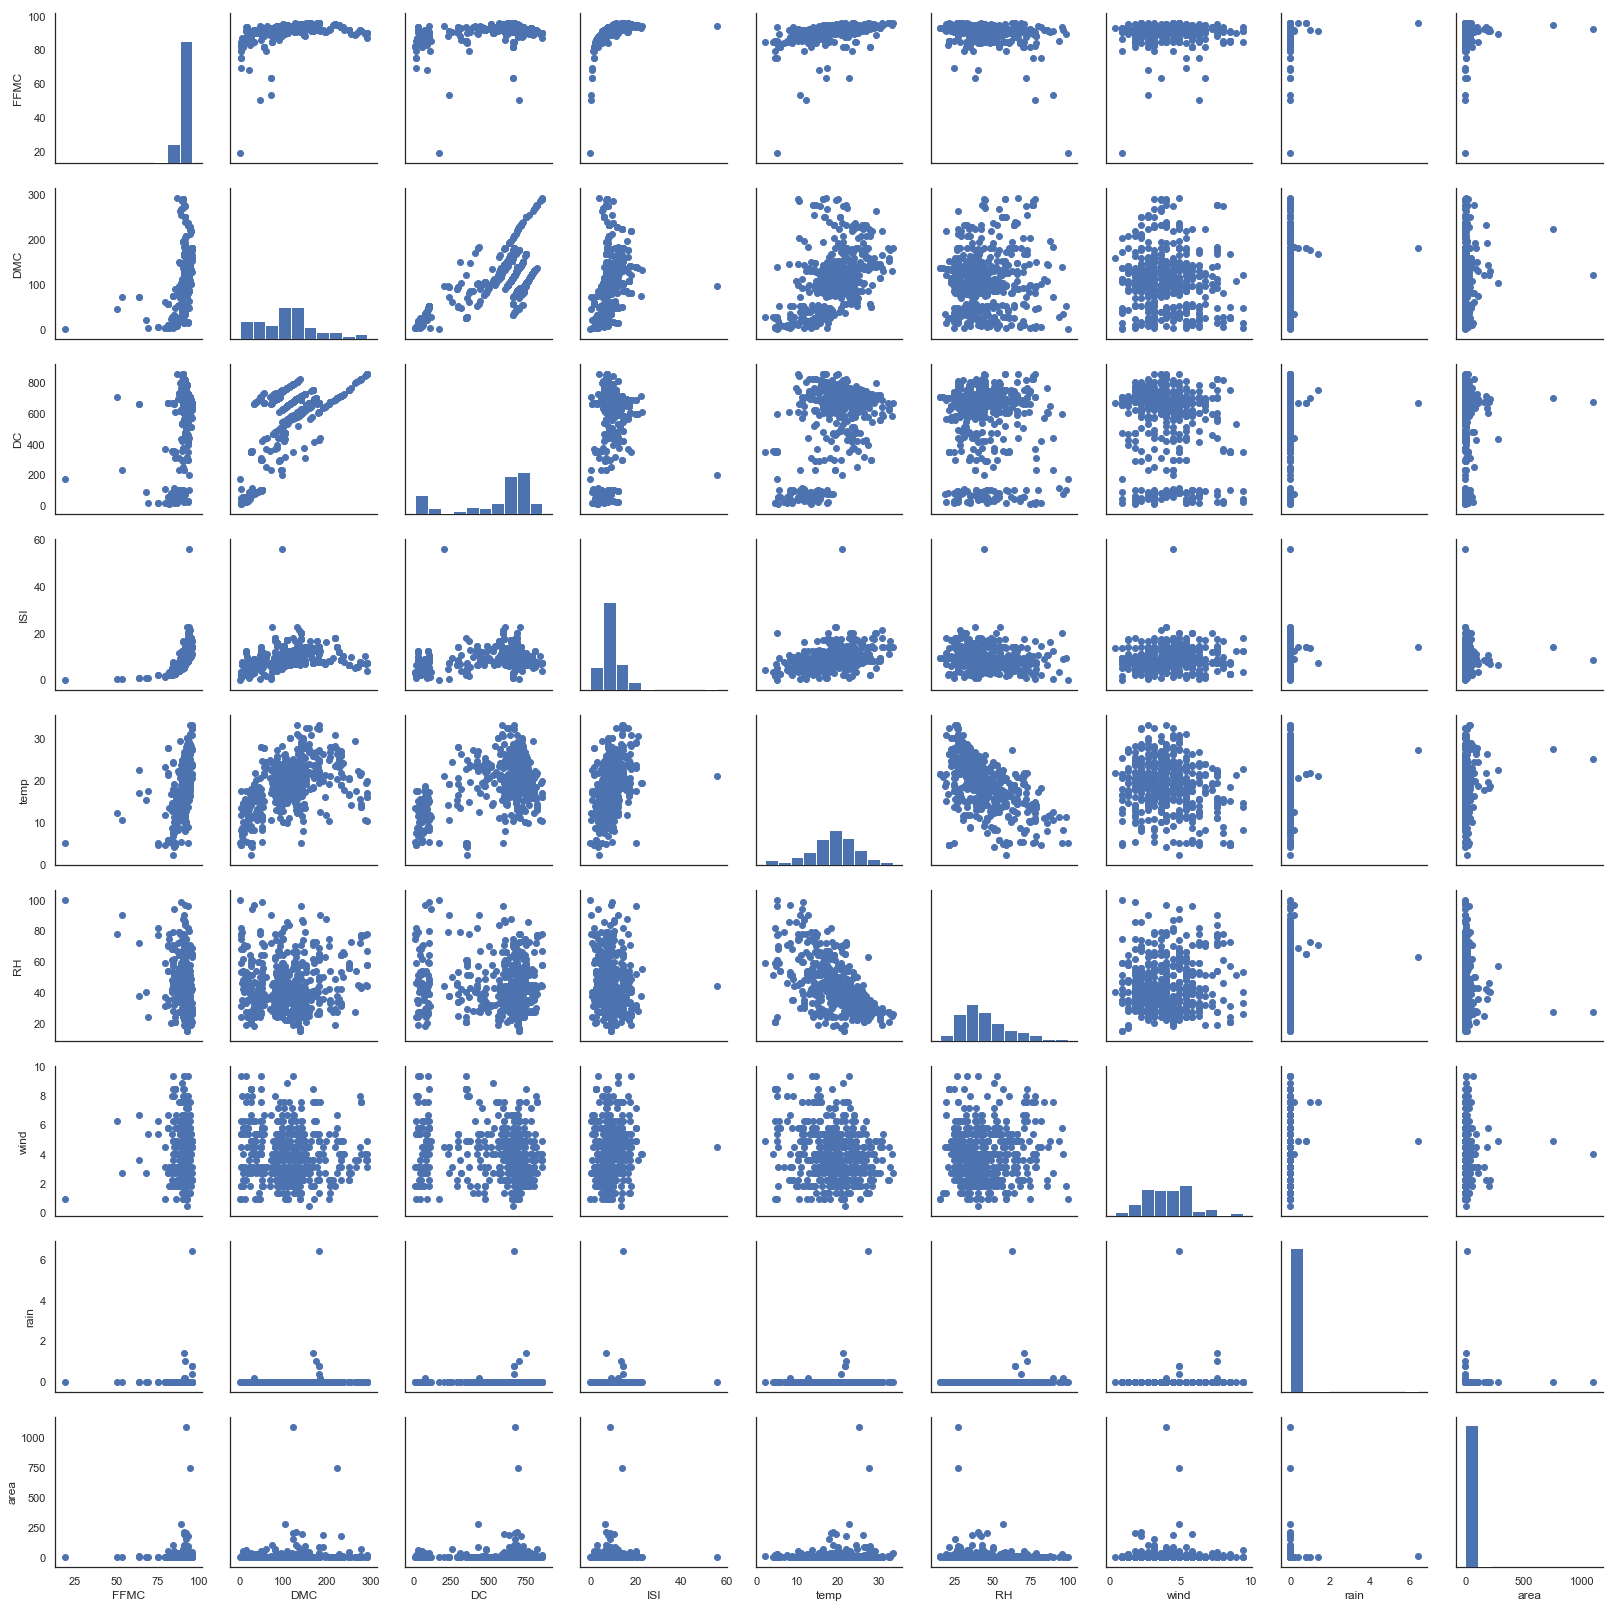

In [14]:
ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain',"area"]
sns.set(style="white")

g = sns.PairGrid(Data[ncols])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

- *Rain & FFMC Feature* - Bar graph shows only one bin as there are **couple of outliers**

## Data Preprocessing

### log transformation & Bounding the Dependent variable

The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality.

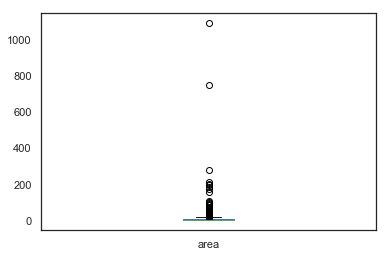

In [15]:
## Box plot
Data["area"].plot(kind='box')

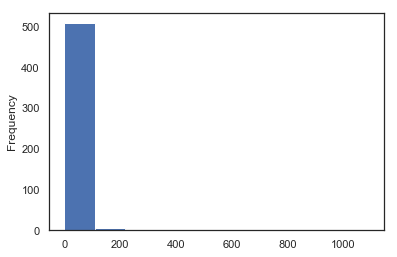

In [16]:
# Fired area in histogram
Data["area"].plot(kind='hist', bins=10)

In [17]:
# Applying Log Transformation
Data["area"]=[ 0 if np.isinf(x) else x for x in (Data["area"]+1).apply(np.log) ]
Encoded_Data["area"]=[ 0 if np.isinf(x) else x for x in (Encoded_Data["area"]+1).apply(np.log) ]

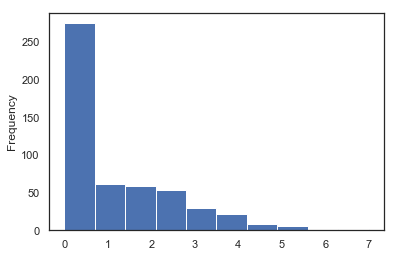

In [18]:
## After log applied
Data["area"].plot(kind='hist', bins=10)

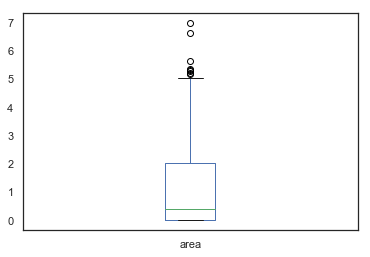

In [19]:
Data["area"].plot(kind='box')

Still, we see some outliers independent variable. It could affect the model building as we have different behavior. Here, **More than 50 percentile of area's are not burned. So it is skewed towards 0**. Hence setting the upper bound


In [20]:
## Setting upper bound to 85 percentile data as we could not find the common behavour from that.
thersold=.85
print(str(thersold)+" percentile of area (log transformed) is "+str(Data["area"].quantile(thersold)))
print(str(thersold)+" percentile of area is "+str(Data["Orgarea"].quantile(thersold)))

Data["area"][Data["area"] > Data["area"].quantile(thersold)]=Data["area"].quantile(thersold)
Encoded_Data["area"][Encoded_Data["area"] > Encoded_Data["area"].quantile(thersold)]=Encoded_Data["area"].quantile(thersold)

0.85 percentile of area (log transformed) is 2.5762652095274587
0.85 percentile of area is 12.147999999999996


In [21]:
##After setting the upper bound
# Data["area"].plot(kind='hist', bins=10)

In [22]:
# Data["area"].plot(kind='box')

## Outlier detection & handling for independent variables

Here we are using the *ZScore* for finding the outliers. Then transform the outliers which are more than 3 to median value


In [23]:
allcols=['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']
ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']

ztrans_data=Data[['X', 'Y', 'month', 'day']]
col_zscores=[]

for col in ncols:
    col_zscore = col + '_zscore'
    ztrans_data[col_zscore] = (Data[col] - Data[col].mean())/Data[col].std(ddof=0)
    col_zscores.append(col_zscore)

In [24]:
## Outliers information in each feature
for col in ncols:
    print(col+ ' column has  '+str(len(Data[np.abs(ztrans_data[col+"_zscore"])>3][col]))+" outliers")
    Data[np.abs(ztrans_data[col+"_zscore"])>3][col]=Data[col].median()

FFMC column has  7 outliers
DMC column has  0 outliers
DC column has  0 outliers
ISI column has  2 outliers
temp column has  0 outliers
RH column has  5 outliers
wind column has  4 outliers
rain column has  3 outliers


## Logistic Regression - Burned or Not

Before getting into the finding of area's burned, I planned to produce one more feature that helps to identify whether it is burned or not with available input data. here we experimented with SVM & Logistics Regression

In [25]:
## Standardzing the input variables

def StandardScalerData(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

In [26]:
## For Hyper parameter selection

def param_selection(model,param_grid, X_train, y_train, nfolds=10):
#     print(str(datetime.datetime.now())+" : Starting Param selection")
    grid_search = GridSearchCV(model, param_grid, cv=nfolds,verbose =1)
#     grid_search = GridSearchCVProgressBar(model, param_grid, cv=nfolds) 
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
#     print(str(datetime.datetime.now())+" : Param selection is completed")
    return grid_search

In [27]:
## Creating a categorical output 

Data['burned']=1
Data['burned'][Data["area"]==0]=0

Encoded_Data['burned']=1
Encoded_Data['burned'][Encoded_Data["area"]==0]=0

Data['burned'].value_counts()

1    270
0    247
Name: burned, dtype: int64

In [28]:
Encod_ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr', 'aug', 'feb','jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'X_1', 'X_2','X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_2', 'Y_3', 'Y_4','Y_5', 'Y_6', 'Y_8', 'Y_9']
std_cols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

In [29]:
## Apply the standard scaling for numeric features
Standarized_Data=Encoded_Data
Standarized_Data[std_cols]=StandardScalerData(Encoded_Data[std_cols])

In [30]:
## Splitting the train & test data
X_train, X_test, y_train, y_test = train_test_split(Standarized_Data[Encod_ncols], Standarized_Data['burned'],  test_size=0.2, random_state=0)

### Validation Summary

- **TP (True Positive)** - Predicted & Actuals are Burned
- **TN (True Negative)** - Predicted & Actuals are *not Burned*
- **FP (False Positive)** - Predicted is Burned but acutal is not Burned
- **FN (False Negative)** - Predicted is not Burned but acutal is Burned


Accuracy = (TP + TN) / (TP + TN + FP + FN)

**Precision** = TP / (TP + FP)

*(Predicted & Actuals are Burned) / (Predicted & Actuals are Burned) + (Predicted is Burned but acutal is not Burned)*

From the prediction of positive, how many are correct ?

**Recall** = TP / (TP + FN)

*(Predicted & Actuals are Burned) / (Predicted & Actuals are Burned) + (Predicted is not Burned but acutal is Burned)*

From overall burned, how many are predicted correctly ?


In [31]:
## Applying logistic regression with different parameters
## C - Margin : smaller values specify stronger regularization
LGR_grid_result=param_selection(linear_model.LogisticRegression(),{'penalty':['l1', 'l2'],'C':[0.00001, 0.0001, 0.001,0.01,0.5,1,10,100]}, X_train, y_train,10)
LGR_grid_result.best_estimator_

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 1, 'penalty': 'l2'}


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    2.2s finished


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

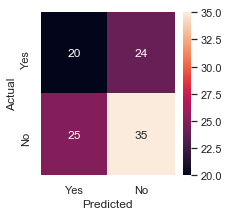

Means Cross Validation Accuracy Score :0.6830524203493218
Precision : From the Prediction of burned, 74.0% values are predicted correctly
Recall : From overall burned, 71.0% values are predicted correctly
AUC : 65.0%


In [32]:
# Reproducing the model from best estimator result
modelLG=LogisticRegression(C=1, penalty='l2')
modelLG.fit(X_train, y_train)

# Validating the model
y_pred = modelLG.predict(X_test)
y_train_pred=modelLG.predict(X_train)

## Confusion Matrix 
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',xticklabels=['Yes','No'], yticklabels=['Yes','No'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## K Fold Validation with 10 Folds
scores = cross_val_score(modelLG, Standarized_Data[Encod_ncols], Standarized_Data['burned'], cv=10, scoring="accuracy")
scores=np.sqrt(scores)
print("Means Cross Validation Accuracy Score :"+str(np.mean(scores)))
print('Precision : From the Prediction of burned, '+str(round(np.mean(np.sqrt(cross_val_score(modelLG, Standarized_Data[Encod_ncols], Standarized_Data['burned'], cv=10, scoring="recall"))),2)*100)+'% values are predicted correctly')
print('Recall : From overall burned, '+str(round(np.mean(np.sqrt(cross_val_score(modelLG, Standarized_Data[Encod_ncols], Standarized_Data['burned'], cv=10, scoring="precision"))),2)*100)+'% values are predicted correctly')
print('AUC : '+str(round(np.mean(np.sqrt(cross_val_score(modelLG, Standarized_Data[Encod_ncols], Standarized_Data['burned'], cv=10, scoring="roc_auc"))),2)*100)+'%')


In [33]:
## Applying SVM with different parameters
SVC_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,50,100,150], 'gamma' : [0.0001,0.001, 0.01, 0.1, 1,10,100], 'kernel':['poly','rbf']}
SVC_grid_result=param_selection(SVC(),SVC_param_grid, X_train, y_train,5)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:   11.3s finished


In [34]:
SVC_grid_result.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

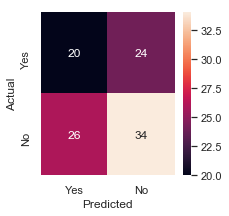

Means Cross Validation Accuracy Score :0.7244259208339294
Precision : From the Prediction of burned, 83.0% values are predicted correctly
Recall : From overall burned, 74.0% values are predicted correctly
AUC : 68.0%


In [35]:
# Reproducing the model from best estimator result
modelSVC=SVC(C=10,  gamma=0.01, kernel='rbf')
modelSVC.fit(X_train, y_train)

## Validation
y_pred = modelSVC.predict(X_test)
y_train_pred=modelSVC.predict(X_train)

## Confusion Matrix 
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',xticklabels=['Yes','No'], yticklabels=['Yes','No'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## K Fold Validation with 10 Folds
scores = cross_val_score(modelSVC, Standarized_Data[Encod_ncols], Standarized_Data['burned'], cv=10, scoring="accuracy")
scores=np.sqrt(scores)
print("Means Cross Validation Accuracy Score :"+str(np.mean(scores)))
print('Precision : From the Prediction of burned, '+str(round(np.mean(np.sqrt(cross_val_score(modelSVC, Standarized_Data[Encod_ncols], Standarized_Data['burned'], cv=10, scoring="recall"))),2)*100)+'% values are predicted correctly')
print('Recall : From overall burned, '+str(round(np.mean(np.sqrt(cross_val_score(modelSVC, Standarized_Data[Encod_ncols], Standarized_Data['burned'], cv=10, scoring="precision"))),2)*100)+'% values are predicted correctly')
print('AUC : '+str(round(np.mean(np.sqrt(cross_val_score(modelSVC, Standarized_Data[Encod_ncols], Standarized_Data['burned'], cv=10, scoring="roc_auc"))),2)*100)+'%')


### Model selection 
-  From above 2 models, SVM is better with not only accuracy metric, but also with precision & recall
-  So using the SVM model to predict whether the area is burned or not


In [36]:
Standarized_Data['BurnedPred']=modelSVC.predict(Standarized_Data[Encod_ncols])
# Data['BurnedPred']=modelSVC.predict(Standarized_Data[Encod_ncols])
# Encoded_Data['BurnedPred']=modelSVC.predict(Standarized_Data[Encod_ncols])

## Model Bulding & Evaluation

In [37]:
## Common Function for validations - validate Train and Test data metrics, Cross Validation, Overall Validation

def Validations(model,X_col, Data,X_train, X_test, y_train, y_test,coeffs=0):
    y_col="area"
    
    
    plt.subplots(figsize=(8,8))
    
    if coeffs==1:
        ## coefficients of features: Only for linear algorithm
        plt.subplot(2,2,1)
        coefs=pd.DataFrame({'Featrures':X_col, 'Coeff':model.coef_})
        ## Accounting both positive & negative important coefficients
        coefs=pd.concat([coefs.sort_values(by=['Coeff'],ascending=False).head(5),coefs.sort_values(by=['Coeff'],ascending=False).tail(5)])
#         print("Top & Bottom 5 Features of Coeff's")
#         print("_______________________________")
#         print(coefs)
        
        plt.bar(coefs['Featrures'], coefs['Coeff'])
        plt.xticks(rotation=70)
        plt.title('Top & Bottom 5 Features of Coeff''s ')
    
    elif coeffs==2:
        ## To display the important features : Only for Random Forest algorithm
        plt.subplot(2,2,1)
        coefs=pd.DataFrame({'Featrures':X_col, 'Coeff':model.feature_importances_})
        coefs=coefs.sort_values(by=['Coeff'],ascending=False).head(10)
#         print("Top 10 Features of Coeff's")
#         print("_______________________________")
#         print(coefs)
        plt.bar(coefs['Featrures'], coefs['Coeff'])
        plt.xticks(rotation=70)
        plt.title('Top 10 important Features ')
    
## Train dataset Validation
#     y_train_pred=model.predict(X_train)
#     print("Validation with Train dataset :")
#     print("_______________________________")
#     print("RMSE Score "+str(np.sqrt(mean_squared_error(y_train,y_train_pred))))
#     print("Actual Data : Min: "+str(y_train.min())+" , Max :"+str(y_train.max()))
#     print("Predicted Data : Min: "+str(y_train_pred.min())+" , Max :"+str(y_train.max()))

## Test dataset Validation
#     y_pred=model.predict(X_test)
#     print(" ")
#     print("Validation with Test dataset :")
#     print("_______________________________")
#     print("RMSE Score "+str(np.sqrt(mean_squared_error(y_test, y_pred))))
#     print("Actual Data : Min: "+str(y_test.min())+" , Max :"+str(y_test.max()))
#     print("Predicted Data : Min: "+str(y_pred.min())+" , Max :"+str(y_pred.max()))

#     ## Ploting the Prediction & Actual test data in scatter plot
#     plt.subplot(2,2,1)
#     plt.scatter(y_test,y_pred)
#     plt.ylabel('Predicted')
#     plt.xlabel('Actual')
#     plt.title('Test data comparision')
    
    ## K Fold Validation
    scores = cross_val_score(model, Data[X_col], Data[y_col], cv=10, scoring="neg_mean_squared_error")
    scores=np.sqrt(abs(scores))
    
    
    ## Plotting the result of K Fold Validation
    plt.subplot(2,2,2)
    pd.Series(np.sqrt(scores)).plot(kind="box", label="RMSE");
    plt.title('RMSE from 10 Folds')
    
    print(" ")
    print("10 Fold validation :")
    print("_______________________________")
    
    print("Cross Validation RMSE Scores "+str(scores))
    print("Cross Validation RMSE Mean Score "+str(np.mean(scores, dtype=np.float64)))
    
    ## RMSE of Orginal Area
    print("Cross Validation RMSE Mean Score Orginial Burned Area Value "+str(np.exp(np.mean(scores, dtype=np.float64))-1))
    
    ## Multiplying the BurnedPred Feature with Predicted value
    print(" ")
    print("With effect of Burned Categorical Feature  ")
    print("_______________________________")
    O_Data_pred=model.predict(Data[X_col])
    Data_pred=O_Data_pred*Data['BurnedPred']
    
    #print("RMSE of Log Transformed Area : "+str(np.sqrt(mean_squared_error(Data[y_col], Data_pred))))
    print("RMSE of Log Transformed Area : "+str(np.sqrt(mean_squared_error(np.log(Data['Orgarea']+1), Data_pred))))
    
    ## RMSE of Orginal Area
    print("RMSE of Orginal Area : "+str(np.exp(np.sqrt(mean_squared_error(np.log(Data['Orgarea']+1), Data_pred)))-1))
    
    print(" ")
    
    
     ## Ploting the Prediction & Actual whole data in scatter plot - with burned feature
    plt.subplot(2,2,3)
    plt.scatter(np.log(Data['Orgarea']+1),O_Data_pred)
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.title('Whole data comparision')
    
    ## Ploting the Prediction & Actual Whole data in scatter plot - with burned feature
    plt.subplot(2,2,4)
    plt.scatter(np.log(Data['Orgarea']+1), Data_pred)
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.title('Whole data comparision - with burned feature')
    plt.tight_layout()
    

### Separate Train & Test data for linear computations

In [38]:
Encod_ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr', 'aug', 'feb','jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'X_1', 'X_2','X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_2', 'Y_3', 'Y_4','Y_5', 'Y_6', 'Y_8', 'Y_9','BurnedPred']
std_cols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

In [39]:
## Spliting the train & test data
X_train, X_test, y_train, y_test = train_test_split(Standarized_Data[Encod_ncols], Standarized_Data["area"],  test_size=0.2, random_state=0)

In [40]:
## Fitting the linear model
model = LinearRegression(fit_intercept=True, n_jobs=None,normalize=False)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.34751105 1.15012086 0.86011446 1.33414896 1.59364286 1.2094346
 0.961147   1.21815496 1.02745641 1.82361076]
Cross Validation RMSE Mean Score 1.2525341913409132
Cross Validation RMSE Mean Score Orginial Burned Area Value 2.4991993715456498
 
With effect of Burned Categorical Feature  
_______________________________
RMSE of Log Transformed Area : 1.4627185136363008
RMSE of Orginal Area : 3.3176812636700896
 


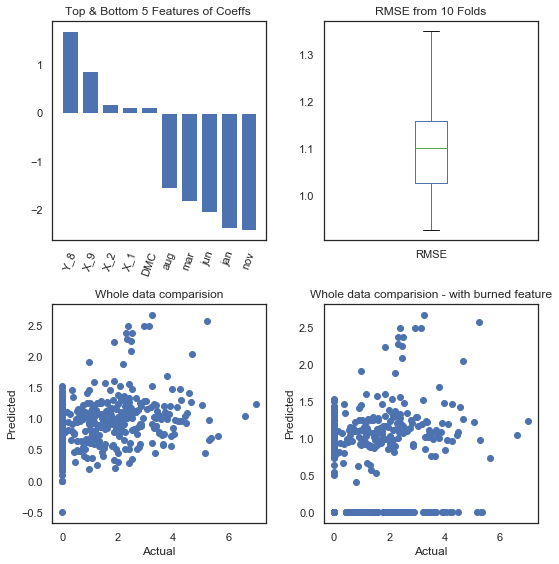

In [41]:
## Validating Linear model
Validations(model,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,1 )

In [42]:
# X=Standarized_Data[Encod_ncols]
# X2 = sm.add_constant(Standarized_Data[Encod_ncols])
# est = sm.OLS(Standarized_Data["area"], X)
# est2 = est.fit()
# print(est2.summary())

### Lasso

In [43]:
## Hyper parameter selection Lasso
LS_grid_result=param_selection(linear_model.Lasso(),{'alpha':[0.00001, 0.0001, 0.001,0.01],'normalize':[False]}, X_train, y_train,10)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 0.01, 'normalize': False}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.9s finished


In [44]:
LS_grid_result.best_estimator_

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.1817059  1.04029789 0.83961772 1.27061592 1.44143609 1.08561746
 0.92729974 1.18857253 0.96707956 1.23523807]
Cross Validation RMSE Mean Score 1.1177480859254534
Cross Validation RMSE Mean Score Orginial Burned Area Value 2.0579601802632848
 
With effect of Burned Categorical Feature  
_______________________________
RMSE of Log Transformed Area : 1.487435005551987
RMSE of Orginal Area : 3.4257289774220334
 


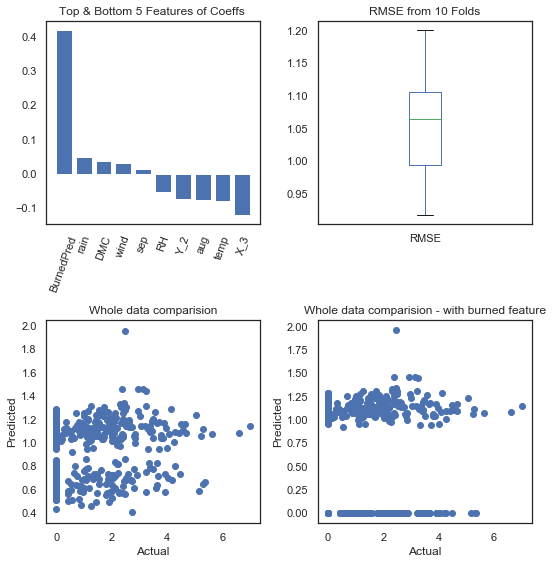

In [45]:
## Reproducing the best paramters and validation
LS_cust=linear_model.Lasso(alpha=.01,   normalize=False)
LS_cust.fit(X_train, y_train)
Validations(LS_cust,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,1 )

In [46]:
print("Out of "+str(len(LS_cust.coef_))+" Features, "+str(len(list(filter(lambda x: x == 0, list(LS_cust.coef_)) )))+" are became 0 as part of lasso regularization")

Out of 42 Features, 27 are became 0 as part of lasso regularization


### Ridge

In [47]:
RD_grid_result=param_selection(linear_model.Ridge(),{'alpha':[0.00001, 0.0001, 0.001,0.01],'normalize':[False]}, X_train, y_train,10)
RD_grid_result.best_estimator_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 0.01, 'normalize': False}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.3s finished


Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.34680509 1.15060159 0.86128172 1.33369981 1.59222383 1.20861811
 0.9599454  1.2173494  1.02729383 1.82098214]
Cross Validation RMSE Mean Score 1.2518800897460811
Cross Validation RMSE Mean Score Orginial Burned Area Value 2.4969112880571953
 
With effect of Burned Categorical Feature  
_______________________________
RMSE of Log Transformed Area : 1.4628190227329227
RMSE of Orginal Area : 3.3181152517229107
 


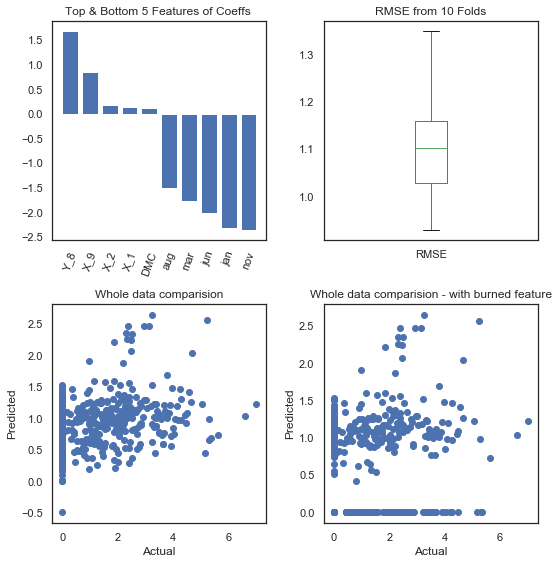

In [48]:
Validations(RD_grid_result.best_estimator_,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,1 )

### SVM

In [49]:
SVR_param_grid = {'C': [0.001,  0.1, 1, 10,100,150,200,300,500], 'gamma' : [0.0001,0.001, 0.01, 0.1, 1,10,100], 
                  'kernel':['rbf'],'epsilon': [ 0.001, 0.01, 0.1,1, 10]}
SVR_grid_result=param_selection(SVR(),SVR_param_grid, X_train, y_train,10)

Fitting 10 folds for each of 315 candidates, totalling 3150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 500, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done 3150 out of 3150 | elapsed:  1.5min finished


In [50]:
SVR_grid_result.best_estimator_

SVR(C=500, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.08414295 1.06388196 0.90915231 1.15175589 1.49166216 1.08391227
 0.9610979  1.19813426 0.96404241 1.13444599]
Cross Validation RMSE Mean Score 1.1042228091930284
Cross Validation RMSE Mean Score Orginial Burned Area Value 2.0168788669134092
 
With effect of Burned Categorical Feature  
_______________________________
RMSE of Log Transformed Area : 1.2691688028182977
RMSE of Orginal Area : 2.5578940214769883
 


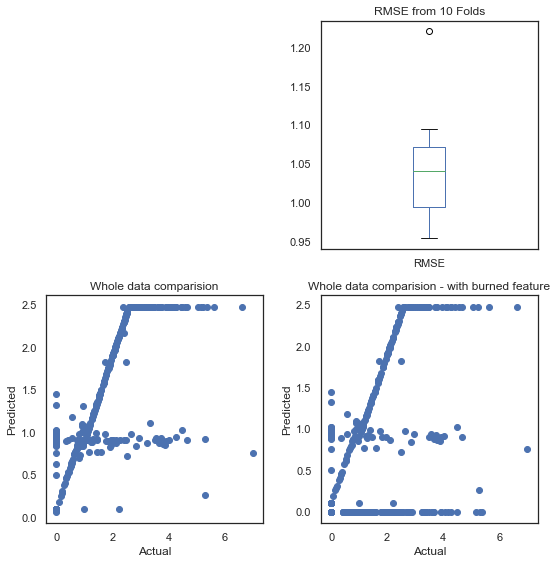

In [51]:
Validations(SVR_grid_result.best_estimator_ ,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,0)

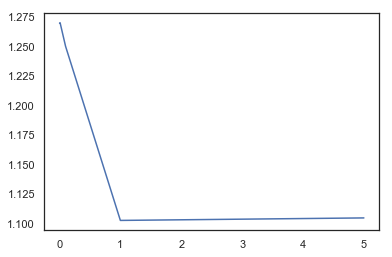

In [52]:
c=[0.001, 0.01, 0.1, 1, 5]
val=[]
for cs in c:
    SVR_exp=SVR(C=cs,epsilon=0.1, gamma=1,  kernel='rbf')
    scores = cross_val_score(SVR_exp, Standarized_Data[Encod_ncols], Standarized_Data['area'], cv=10, scoring="neg_mean_squared_error")
    val.append(np.mean(np.sqrt(abs(scores))))
plt.plot(c,val);

 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [0.94869417 0.93513442 0.79686415 1.2942613  1.56806899 1.10407565
 0.9823545  1.24606411 0.9645114  1.1863845 ]
Cross Validation RMSE Mean Score 1.1026413171877274
Cross Validation RMSE Mean Score Orginial Burned Area Value 2.012111467899789
 
With effect of Burned Categorical Feature  
_______________________________
RMSE of Log Transformed Area : 1.3364934935139945
RMSE of Orginal Area : 2.8056754558179873
 


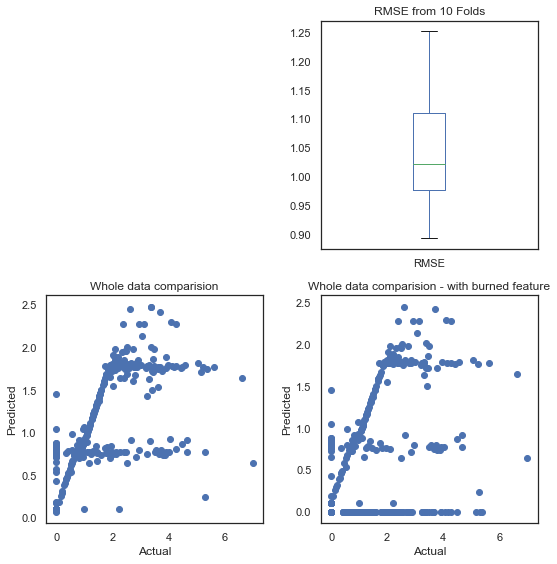

In [53]:
## Changing the max depth of tree. it gives a better result.
SVR_Cust=SVR(C=1,epsilon=0.1, gamma=1,  kernel='rbf')
SVR_Cust.fit(X_train, y_train)
Validations(SVR_Cust,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,0 )

### Decision Tree

In [54]:
#max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
#min_samples_split : The minimum number of samples required to split an internal node
#min_samples_leaf  : The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
#max_leaf_nodes : Grow a tree with max_leaf_nodes in best-first fashion

DT_param_grid = {'criterion': ['mse', 'mae'],'max_depth': range(1,10,2),'min_samples_split': range(2,10,2) ,'min_samples_leaf': [20, 40, 80,100], 'max_leaf_nodes': [5, 20, 100]}
DT_grid_result=param_selection(tree.DecisionTreeRegressor(),DT_param_grid, X_train, y_train,10)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'criterion': 'mse', 'max_depth': 1, 'max_leaf_nodes': 5, 'min_samples_leaf': 100, 'min_samples_split': 8}


[Parallel(n_jobs=1)]: Done 4800 out of 4800 | elapsed:   33.2s finished


In [55]:
DT_grid_result.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=5, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.07317309 0.97879389 0.77463659 1.18182994 1.51276257 1.03558859
 0.93102095 1.2222825  0.93042557 1.18698973]
Cross Validation RMSE Mean Score 1.0827503421603548
Cross Validation RMSE Mean Score Orginial Burned Area Value 1.9527895749415718
 
With effect of Burned Categorical Feature  
_______________________________
RMSE of Log Transformed Area : 1.4844733427654482
RMSE of Orginal Area : 3.4126408514808837
 


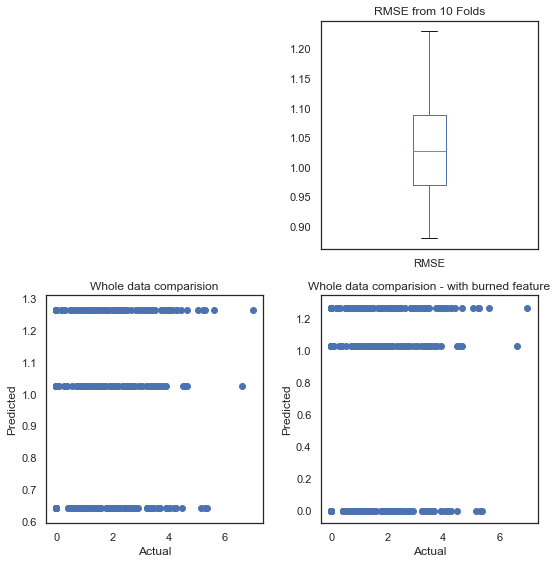

In [56]:
# Validations(DT_grid_result.best_estimator_ ,ncols,Standarized_Data2, X_train, X_test, y_train, y_test )
Validations(DT_grid_result.best_estimator_,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,0 )

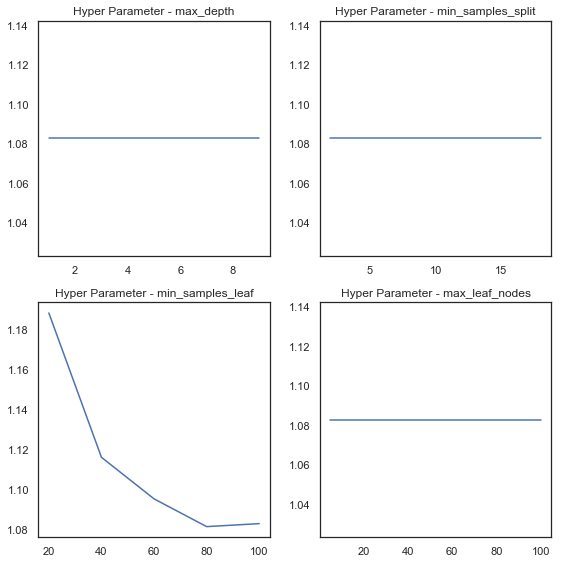

In [57]:
plt.subplots(figsize=(8,8))

plt.subplot(2,2,1)
params= range(1,10,2)
val=[]
for x in params:  
    model=tree.DecisionTreeRegressor(criterion='mse', max_depth=x,min_samples_split=2,max_leaf_nodes=100,  min_samples_leaf=100)
    scores = cross_val_score(model, Standarized_Data[Encod_ncols], Standarized_Data['area'], cv=10, scoring="neg_mean_squared_error")
    val.append(np.mean(np.sqrt(abs(scores))))
plt.plot(params,val);
plt.title('Hyper Parameter - max_depth');

plt.subplot(2,2,2)
params= range(2,20,2)
val=[]
for x in params:  
    model=tree.DecisionTreeRegressor(criterion='mse', max_depth=5,min_samples_split=x,max_leaf_nodes=100,  min_samples_leaf=100)
    scores = cross_val_score(model, Standarized_Data[Encod_ncols], Standarized_Data['area'], cv=10, scoring="neg_mean_squared_error")
    val.append(np.mean(np.sqrt(abs(scores))))
plt.plot(params,val);
plt.title('Hyper Parameter - min_samples_split');

plt.subplot(2,2,3)
params= [20,40,60,80,100]
val=[]
for x in params:  
    model=tree.DecisionTreeRegressor(criterion='mse', max_depth=5,min_samples_split=2,max_leaf_nodes=100,  min_samples_leaf=x)
    scores = cross_val_score(model, Standarized_Data[Encod_ncols], Standarized_Data['area'], cv=10, scoring="neg_mean_squared_error")
    val.append(np.mean(np.sqrt(abs(scores))))
plt.plot(params,val);
plt.title('Hyper Parameter - min_samples_leaf');

plt.subplot(2,2,4)
params= [5,20,40,60,80,100]
val=[]
for x in params:  
    model=tree.DecisionTreeRegressor(criterion='mse', max_depth=5,min_samples_split=2,max_leaf_nodes=x,  min_samples_leaf=100)
    scores = cross_val_score(model, Standarized_Data[Encod_ncols], Standarized_Data['area'], cv=10, scoring="neg_mean_squared_error")
    val.append(np.mean(np.sqrt(abs(scores))))
plt.plot(params,val);
plt.title('Hyper Parameter - max_leaf_nodes');


plt.tight_layout()



 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.07281578 0.96005556 0.78501626 1.16759576 1.52504646 1.0297943
 0.94287436 1.18755216 0.93674874 1.20499601]
Cross Validation RMSE Mean Score 1.0812495382002454
Cross Validation RMSE Mean Score Orginial Burned Area Value 1.9483613404412514
 
With effect of Burned Categorical Feature  
_______________________________
RMSE of Log Transformed Area : 1.4900387368690682
RMSE of Orginal Area : 3.4372674015209013
 


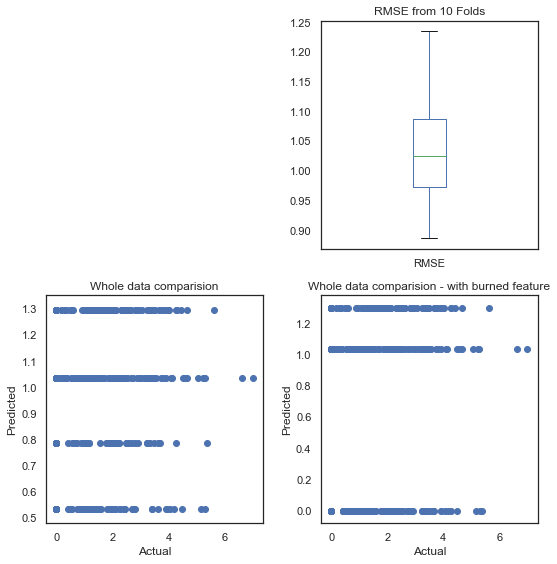

In [58]:
## Changing the max depth of tree. it gives a better result.
DT_Cust=tree.DecisionTreeRegressor(criterion='mse', max_depth=5,min_samples_split=2,max_leaf_nodes=100,  min_samples_leaf=80)
DT_Cust.fit(X_train, y_train)
Validations(DT_Cust,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,0 )

### Random Forest

In [59]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 6)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 3)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


# Create the random grid
RF_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
             }

RF_grid_result=param_selection(RandomForestRegressor(),RF_param_grid, X_train, y_train,5)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 100, 'n_estimators': 100}


[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed: 46.2min finished


 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.10840231 1.03704671 0.77329838 1.30273043 1.53840425 1.04714945
 0.92648302 1.22660651 1.01091218 1.18338401]
Cross Validation RMSE Mean Score 1.1154417248109063
Cross Validation RMSE Mean Score Orginial Burned Area Value 2.0509155466708946
 
With effect of Burned Categorical Feature  
_______________________________
RMSE of Log Transformed Area : 1.4699295950932703
RMSE of Orginal Area : 3.348928944347291
 


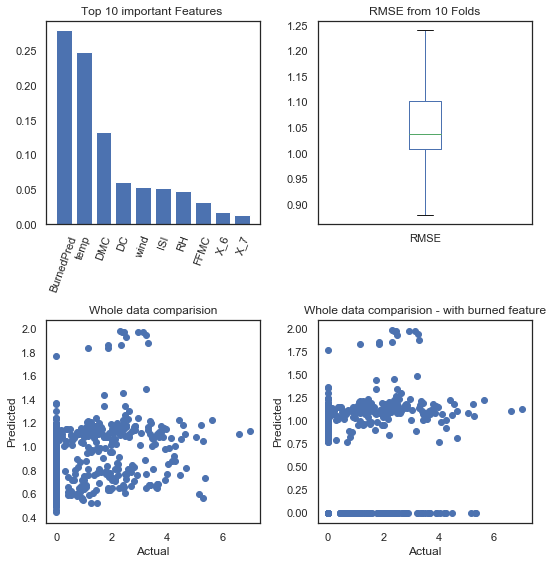

In [60]:
RDF_Cust=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=100,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
RDF_Cust.fit(X_train, y_train)
Validations(RDF_Cust,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,2 )

In [61]:
RF_grid_result.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=100,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.1146302  1.02085887 0.77463151 1.28637902 1.54922463 1.04719032
 0.92562813 1.21685889 0.98184746 1.18832212]
Cross Validation RMSE Mean Score 1.110557116240635
Cross Validation RMSE Mean Score Orginial Burned Area Value 2.0360493557643955
 
With effect of Burned Categorical Feature  
_______________________________
RMSE of Log Transformed Area : 1.4678282075781843
RMSE of Orginal Area : 3.3397997547016276
 


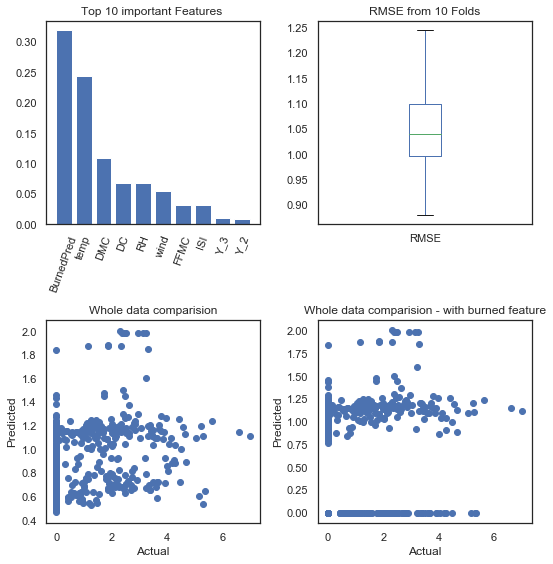

In [62]:
Validations(RF_grid_result.best_estimator_,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,2 )

In [63]:
# plt.subplots(figsize=(8,8))

# plt.subplot(2,2,1)
# params= range(1,10,2)
# val=[]
# for x in params:  
#     model=tree.DecisionTreeRegressor(criterion='mse', max_depth=x,min_samples_split=2,max_leaf_nodes=100,  min_samples_leaf=100)
#     scores = cross_val_score(model, Standarized_Data[Encod_ncols], Standarized_Data['area'], cv=10, scoring="neg_mean_squared_error")
#     val.append(np.mean(np.sqrt(abs(scores))))
# plt.plot(params,val);
# plt.title('Hyper Parameter - max_depth');

# plt.subplot(2,2,2)
# params= range(2,20,2)
# val=[]
# for x in params:  
#     model=tree.DecisionTreeRegressor(criterion='mse', max_depth=5,min_samples_split=x,max_leaf_nodes=100,  min_samples_leaf=100)
#     scores = cross_val_score(model, Standarized_Data[Encod_ncols], Standarized_Data['area'], cv=10, scoring="neg_mean_squared_error")
#     val.append(np.mean(np.sqrt(abs(scores))))
# plt.plot(params,val);
# plt.title('Hyper Parameter - min_samples_split');

# plt.subplot(2,2,3)
# params= [20,40,60,80,100]
# val=[]
# for x in params:  
#     model=tree.DecisionTreeRegressor(criterion='mse', max_depth=5,min_samples_split=2,max_leaf_nodes=100,  min_samples_leaf=x)
#     scores = cross_val_score(model, Standarized_Data[Encod_ncols], Standarized_Data['area'], cv=10, scoring="neg_mean_squared_error")
#     val.append(np.mean(np.sqrt(abs(scores))))
# plt.plot(params,val);
# plt.title('Hyper Parameter - min_samples_leaf');

# plt.subplot(2,2,4)
# params= [5,20,40,60,80,100]
# val=[]
# for x in params:  
#     model=tree.DecisionTreeRegressor(criterion='mse', max_depth=5,min_samples_split=2,max_leaf_nodes=x,  min_samples_leaf=100)
#     scores = cross_val_score(model, Standarized_Data[Encod_ncols], Standarized_Data['area'], cv=10, scoring="neg_mean_squared_error")
#     val.append(np.mean(np.sqrt(abs(scores))))
# plt.plot(params,val);
# plt.title('Hyper Parameter - max_leaf_nodes');

# plt.tight_layout()

 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.12624627 0.9811141  0.74770179 1.2901977  1.53760432 1.05195439
 0.93258439 1.23298615 1.00868066 1.1879118 ]
Cross Validation RMSE Mean Score 1.109698156814524
Cross Validation RMSE Mean Score Orginial Burned Area Value 2.0334426322472647
 
With effect of Burned Categorical Feature  
_______________________________
RMSE of Log Transformed Area : 1.4702598815887231
RMSE of Orginal Area : 3.3503655740839333
 


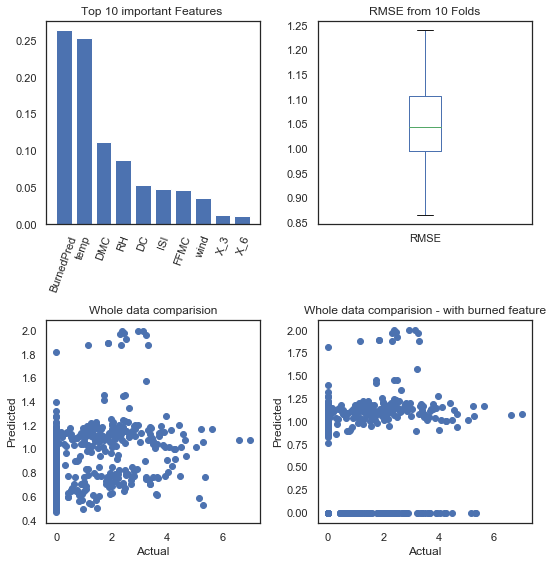

In [64]:
RDF_Cust=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=100,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
RDF_Cust.fit(X_train, y_train)
Validations(RDF_Cust,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,2 )

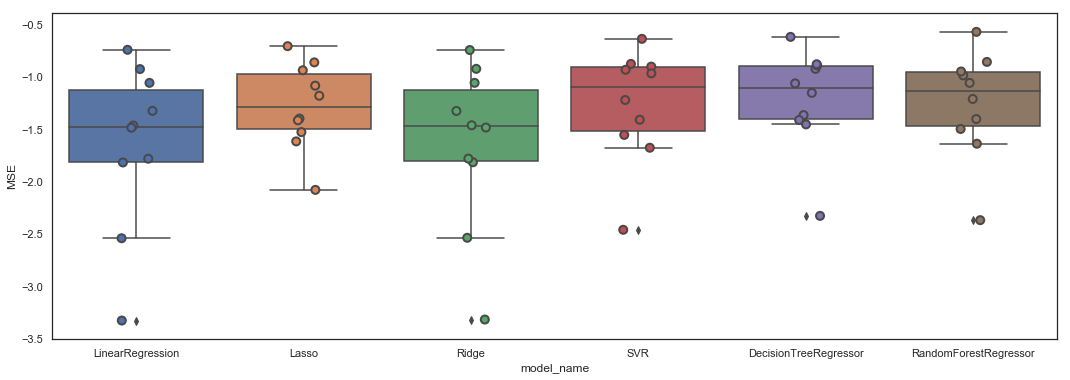

model_name
DecisionTreeRegressor   -1.206722
Lasso                   -1.278802
LinearRegression        -1.644967
RandomForestRegressor   -1.252006
Ridge                   -1.642901
SVR                     -1.261791
Name: MSE, dtype: float64

In [65]:
## All model comparision 

models = [
    LinearRegression(fit_intercept=True, n_jobs=None,normalize=False),
    linear_model.Lasso(alpha=.01,   normalize=False),
    linear_model.Ridge(alpha=0.01, normalize=False),
    SVR(C=1,epsilon=0.1, gamma=1,  kernel='rbf'),
    tree.DecisionTreeRegressor(criterion='mse', max_depth=5,min_samples_split=2,max_leaf_nodes=100,  min_samples_leaf=80),
    RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=100,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)    
]

CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, Standarized_Data[Encod_ncols], Standarized_Data['area'], scoring='neg_mean_squared_error', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

fig, ax = plt.subplots(figsize=(18,6))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'MSE'])
sns.boxplot(x='model_name', y='MSE', data=cv_df)
sns.stripplot(x='model_name', y='MSE', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

cv_df.groupby('model_name').MSE.mean()


Over all **SVM Regression** is giving best results 